# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:
df = pd.read_csv("/Users/Hermie/Desktop/Turing Machine & Deep Learning/tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


View information about the dataset including datatypes and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

The columns with null values are homepage, overview, release_date, runtime, and tagline. For missing numeric values like in runtime, we can impute using the mean or median. For textual columns such as homepage, overview, and tagline, we can fill in a placeholder like "Not Available" or use the mode, while for release_date we could use 1900-01-01.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [4]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [5]:
df = df.dropna(subset=['overview']) # drop na values
df = df.reset_index(drop=True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [6]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 46676.74it/s]


Verify that one-hot encodings are indeed as expected

In [7]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

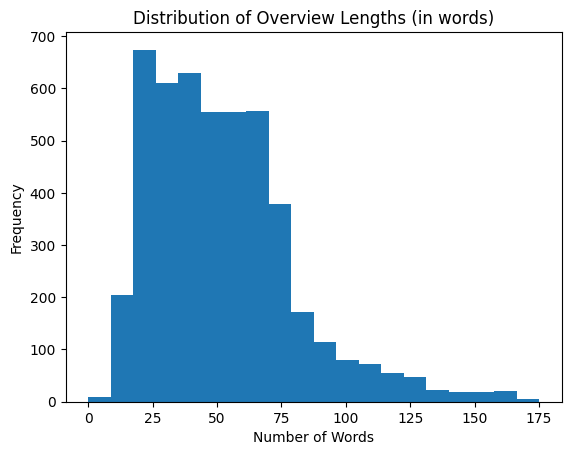

In [8]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
    cleaned_text = remove_punctuation(row["overview"])
    cleaned_text = cleaned_text.lower()
    processed_overviews.append(cleaned_text)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for text in processed_overviews:
    words = text.split()
    overview_lens.append(len(words))

# for the sake of simplicity, add these values as a column to the df
plt.hist(overview_lens, bins=20)
plt.title("Distribution of Overview Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview is about 0 words (some are empty), and the longest is around 170 words.

To minimize movie loss while retaining enough information, a fixed length of about 50 words is a good compromise.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [12]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["proc_overview"].apply(lambda x: len(x.split())) >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])

# print to verify
print(df)

                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4794                                    Cavite   
4795                               El Mariachi   
4797                 Signed, Sealed, Delivered   
4798                          Shanghai Calling   
4799                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                          

/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_11101/3820599864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = df["proc_overview"].apply(lambda x: x.split()[:token_len])


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [13]:
# hint: store all words for all movies in a set, change it to a list and sort
all_words = set()
for overview in df["proc_overview"]:
    for word in overview:
        all_words.add(word)

# Convert the set to a sorted list and compute the vocabulary length
vocab = sorted(list(all_words))
vocab_len = len(vocab)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [14]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(encode_labels(word, vocab)) # get encoding for this word
    sentence_encode = np.sum(np.array(sentence_encode), axis=0) # sum over axis=1
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:04<00:00, 1060.24it/s]
/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_11101/2627491038.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["one_hot_overview"] = encoded_labels


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

Each overview is encoded as a one-hot vector of length equal to our vocabulary size (call it 𝑉). If each float occupies 16 bytes, then storing one vector requires 𝑉×16 bytes.

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

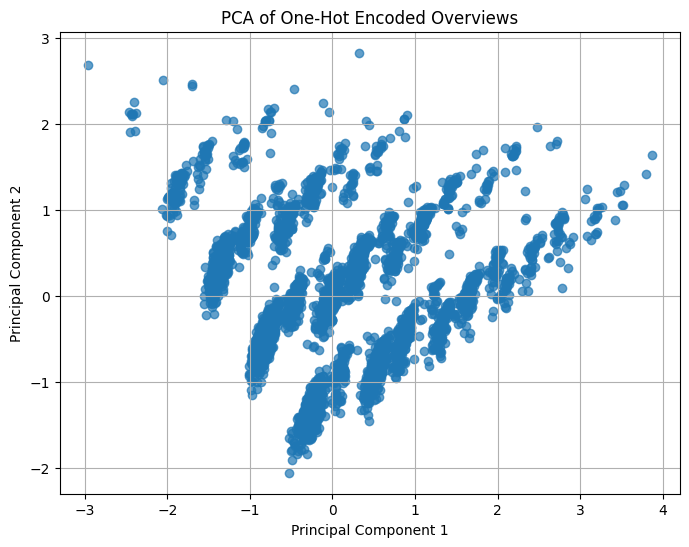

In [16]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# Convert the one_hot_overview column (which contains numpy arrays) into a 2D numpy array
one_hot_matrix = np.stack(df["one_hot_overview"].values)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(one_hot_matrix)

# Plot the 2-D PCA result as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title("PCA of One-Hot Encoded Overviews")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

There isn’t any clear interpretable structure - some clusters are visible, suggesting there might be groupings based on similar vocabulary. However, the clusters aren't sharply separated, so their exact interpretation remains somewhat ambiguous.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [ ]:
# Quantify how much variance is explained by the 2D PCA projection and how much is lost
explained_variance = pca.explained_variance_ratio_
total_explained = explained_variance.sum()
variance_loss = 1 - total_explained

print("Total variance explained by 2 components: {:.2%}".format(total_explained))
print("Variance lost in the 2D projection: {:.2%}".format(variance_loss))


Total variance explained by 2 components: 11.29%
Variance lost in the 2D projection: 88.71%


The 2D PCA projection retains only about 11.29% of the total variance, meaning that roughly 88.71% of the variance is lost.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

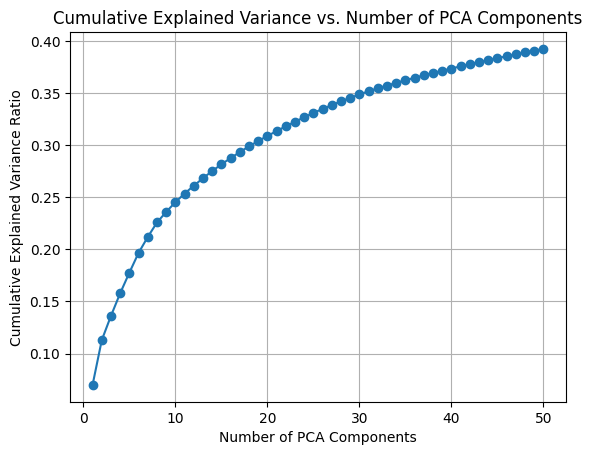

In [18]:
# Set up PCA object with the desired number of components
one_hot_matrix = np.stack(df["one_hot_overview"].values)
pca = PCA(n_components=50)
# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(one_hot_matrix)
# get explained variance ratio from object, store it in a list
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# set up y label, x label, title
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance vs. Number of PCA Components")
plt.grid(True)
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [19]:
threshold = 0.80  # 80% variance

# Find the smallest number of components needed to reach at least 80% variance
num_components_for_80 = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components needed for >= 80% variance: {num_components_for_80}")

Number of components needed for >= 80% variance: 1


1

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [21]:
n_dims = num_components_for_80  # number of PCA components from Q3.5
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(one_hot_matrix)
df.loc[:, "overview_pca"] = list(labels_pca)

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [22]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20, random_state=42)
# fit model
kmeans.fit(labels_pca)

y_preds = kmeans.predict(labels_pca)
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
print(df[df["cluster_kmeans"] == 0])

                    title                                           overview  \
86    Shrek Forever After  A bored and domesticated Shrek pacts with deal...   
118           Ratatouille  A rat named Remy dreams of becoming a great Fr...   
135           The Wolfman  Lawrence Talbot, an American man on a visit to...   
214     The Perfect Storm  In October 1991, a confluence of weather condi...   
236           Windtalkers  Joe Enders is a gung-ho Marine assigned to pro...   
...                   ...                                                ...   
4738           Queen Crab  A meteor crashes into a quiet lake in the remo...   
4750              Hayride  A college student returning home for Halloween...   
4759    George Washington  A delicately told and deceptively simple story...   
4777          Dutch Kills  A desperate ex-con is forced to gather his old...   
4786                Clean  After losing her husband to a heroin overdose,...   

                                       

/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_11101/2158140443.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_kmeans"] = y_preds # set predictions


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

The clusters capture some thematic similarities—movies like Shrek Forever After and Ratatouille appear together, indicating a grouping of family-friendly films. However, some clusters mix genres in ways that don't fully match intuitive groupings, suggesting that while the clustering is on the right track, further tuning or richer features could improve its alignment with typical movie genres.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

The plot shows a steep drop from 1 to around 6 clusters, after which the inertia decreases more slowly. There’s no single sharp elbow, but around 6 or 7 clusters seems like a reasonable choice.

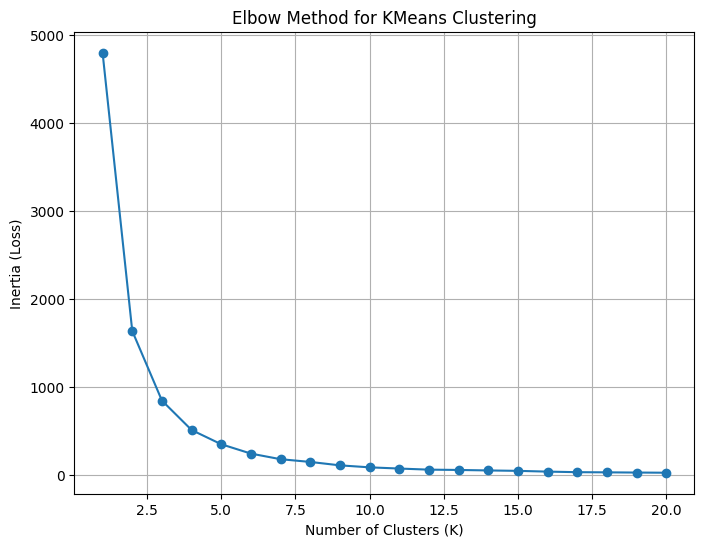

In [23]:
cluster_sizes = range(1, 21)
inertias = []

# For each k, fit KMeans and record the inertia (loss)
for k in cluster_sizes:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(labels_pca)  # Using the PCA-transformed features from Q3.6
    inertias.append(km.inertia_)

# Plot the inertia (loss) vs. cluster size
plt.figure(figsize=(8, 6))
plt.plot(cluster_sizes, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Loss)")
plt.title("Elbow Method for KMeans Clustering")
plt.grid(True)
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [24]:
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture Model with 20 components
gmm = GaussianMixture(n_components=20, random_state=42)

# Fit the GMM on the PCA-transformed features (labels_pca)
gmm.fit(labels_pca)

# Predict cluster labels
y_preds_gmm = gmm.predict(labels_pca)

# Add the predicted cluster labels to the dataframe
df["cluster_gmm"] = y_preds_gmm

# Print out the elements of a chosen cluster (e.g., cluster 0)
print(df[df["cluster_gmm"] == 0])

                    title                                           overview  \
86    Shrek Forever After  A bored and domesticated Shrek pacts with deal...   
118           Ratatouille  A rat named Remy dreams of becoming a great Fr...   
135           The Wolfman  Lawrence Talbot, an American man on a visit to...   
206   Clash of the Titans  Born of a god but raised as a man, Perseus is ...   
214     The Perfect Storm  In October 1991, a confluence of weather condi...   
...                   ...                                                ...   
4699       Perfect Cowboy  Two gay fathers of a straight country western ...   
4738           Queen Crab  A meteor crashes into a quiet lake in the remo...   
4759    George Washington  A delicately told and deceptively simple story...   
4777          Dutch Kills  A desperate ex-con is forced to gather his old...   
4786                Clean  After losing her husband to a heroin overdose,...   

                                       

/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_11101/1883963941.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_gmm"] = y_preds_gmm


**Q5.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

Based on my viewing experience, the clusters mostly make sense—movies with similar themes tend to group together.
The GMM clusters are similar to K-means—they mostly group together movies with similar themes. However, GMM produces softer, probabilistic boundaries, so some clusters overlap more. Overall, both methods give reasonable groupings, with GMM capturing uncertainty a bit better.

**Q5.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

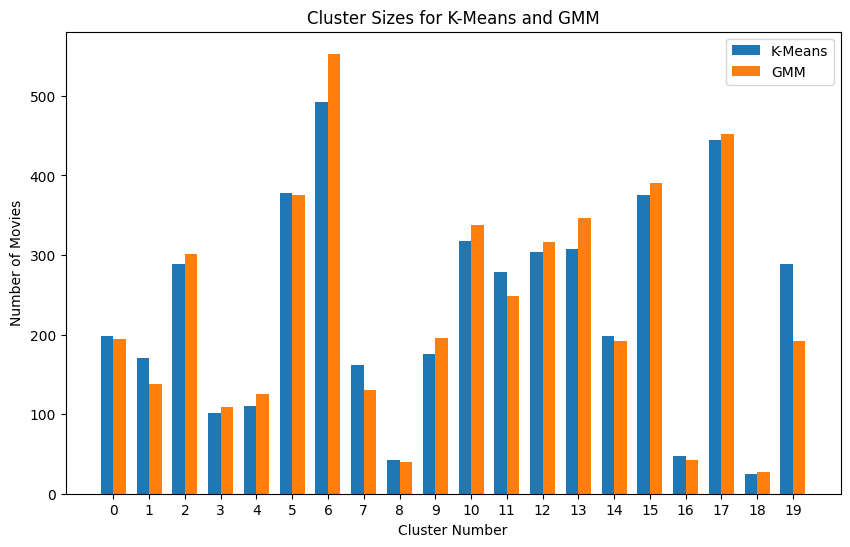

In [25]:
# Get counts of movies per cluster from K-Means and GMM, sorted by cluster number
kmeans_counts = df["cluster_kmeans"].value_counts().sort_index()
gmm_counts = df["cluster_gmm"].value_counts().sort_index()

# Create an array for the x-axis positions
clusters = np.arange(len(kmeans_counts))

# Plotting the bars
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(clusters - bar_width/2, kmeans_counts.values, width=bar_width, label="K-Means")
plt.bar(clusters + bar_width/2, gmm_counts.values, width=bar_width, label="GMM")

# Add labels, title, and legend
plt.xlabel("Cluster Number")
plt.ylabel("Number of Movies")
plt.title("Cluster Sizes for K-Means and GMM")
plt.xticks(clusters, kmeans_counts.index)
plt.legend()
plt.show()

**Q5.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Some clusters differ noticeably in size between K-Means and GMM. Generally, K-Means tends to produce more uniform cluster sizes because it partitions the space into Voronoi regions. GMM allows clusters to overlap probabilistically, so it may group more data in certain clusters and less in others, resulting in more variation.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [26]:
prev_watch = "Avatar"

# Find the cluster index for "Avatar" using K-Means
cluster_kmeans = df.loc[df["title"] == prev_watch, "cluster_kmeans"].iloc[0]

# Find the cluster index for "Avatar" using GMM
cluster_gmm = df.loc[df["title"] == prev_watch, "cluster_gmm"].iloc[0]

# Print out recommendations based on K-Means
print("Movies similar to 'Avatar' according to K-Means clustering:")
print(df[df["cluster_kmeans"] == cluster_kmeans]["title"].unique())

# Print out recommendations based on GMM
print("\nMovies similar to 'Avatar' according to GMM clustering:")
print(df[df["cluster_gmm"] == cluster_gmm]["title"].unique())


Movies similar to 'Avatar' according to K-Means clustering:
['Avatar' 'Tangled' 'The Avengers' 'The Golden Compass' 'Iron Man 3'
 'Monsters University' 'The Great Gatsby' 'Jupiter Ascending'
 'The Jungle Book' 'Night at the Museum: Battle of the Smithsonian'
 'X-Men Origins: Wolverine' 'Frozen' 'Thor' 'Flushed Away'
 'Men in Black II' 'Kung Fu Panda 3' 'Sahara' 'The Bourne Ultimatum'
 'Prometheus' 'The Chronicles of Riddick' 'The Wolverine'
 'Mr. & Mrs. Smith' 'Minority Report' 'Public Enemies' 'True Lies'
 'The Taking of Pelham 1 2 3' 'Blood Diamond' 'Hercules' 'Black Hawk Down'
 'Cloudy with a Chance of Meatballs' 'Contact' 'The Interpreter'
 'Hotel Transylvania' 'Open Season' 'Enemy at the Gates'
 'Arthur Christmas' 'All That Jazz' 'Looney Tunes: Back in Action'
 'Exorcist: The Beginning' 'Dreamgirls' 'Tears of the Sun'
 'The Simpsons Movie' 'The SpongeBob Movie: Sponge Out of Water'
 'The Siege' 'Hall Pass' 'The X Files' 'Dreamcatcher' 'Lincoln'
 'Space Cowboys' 'Death Race' 'Hudso

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

Not really - neither recommender seems reliable. They return a broad mix of movies that don't consistently match the vibe of "Avatar." The clusters are based on broad statistical features rather than nuanced similarities, so I'd hesitate to use them for a real movie recommendation.

**Q6.3** How would you try making the recommender systems better?

I’d improve the recommender by using more detailed features. For example, instead of clustering on PCA-reduced one-hot text, I’d extract richer movie representations (using metadata like cast, director, ratings, or even deep learning embeddings from plots and images). Additionally, combining content-based filtering with collaborative filtering could yield more personalized and nuanced recommendations.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

I would aggregate the features (e.g., the PCA embeddings or cluster memberships) of all the movies the dentist liked to build a combined "user profile." Then, I'd recommend movies that are closest to this aggregated profile, rather than just basing the recommendation on a single movie. This approach, often called "multi-item" or "hybrid" recommendation, better reflects the user's overall taste.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [27]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = df.loc[df["title"] == "Avatar", "overview_pca"].iloc[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(row["overview_pca"], prev_watch_enc))

df["cos_sim_to_avatar"] = sims
df = df.sort_values("cos_sim_to_avatar", ascending=False)
df # print to verify

/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_11101/3575449923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cos_sim_to_avatar"] = sims


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.171306,2,2,1.0
2617,Peeples,The story follows what happens when a child ps...,"[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, story, follows, what, happens, when, a, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.01961,2,2,1.0
2553,The Last House on the Left,A group of teenage girls heading into the city...,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, group, of, teenage, girls, heading, into, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.050656,2,2,1.0
2554,The Wedding Date,With the wedding of her younger sister fast ap...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[with, the, wedding, of, her, younger, sister,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.601702,14,14,1.0
2556,The Princess Bride,"In this enchantingly cracked fairy tale, the b...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[in, this, enchantingly, cracked, fairy, tale,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.37501,9,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2658,Groundhog Day,"A narcissistic TV weatherman, along with his a...","[{""id"": 10749, ""name"": ""Romance""}, {""id"": 14, ...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, narcissistic, tv, weatherman, along, with,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.939235,0,0,-1.0
2662,Freedom,Two men separated by 100 years are united in t...,"[{""id"": 18, ""name"": ""Drama""}]",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[two, men, separated, by, 100, years, are, uni...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",-0.076049,19,19,-1.0
2663,Unforgiven,"William Munny is a retired, once-ruthless kill...","[{""id"": 37, ""name"": ""Western""}]",Western,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[william, munny, is, a, retired, onceruthless,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.846668,17,17,-1.0
2664,Manderlay,"In 1933, after leaving Dogville, Grace Margare...","[{""id"": 18, ""name"": ""Drama""}]",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[in, 1933, after, leaving, dogville, grace, ma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.24297,12,12,-1.0


Cosine similarity directly compares the semantic content of movie overviews. For instance, by using "Avatar" as a reference, we get recommendations based on how closely other movies' overview features align. This method offers more targeted suggestions than clustering, which groups movies into broader, less nuanced categories.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [28]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [29]:
import time
import timeit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Data preparation

# use the "first_10" column which contains the first 10 words of the processed overview.
# If not already defined, create "first_10" as follows:
df_train["first_10"] = df_train["proc_overview"].apply(lambda x: " ".join(x[:10]))
df_test["first_10"]  = df_test["proc_overview"].apply(lambda x: " ".join(x[:10]))

# Our label will be the processed genre, stored in "proc_genres"
y_train = df_train["proc_genres"]
y_test  = df_test["proc_genres"]

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train["first_10"])
X_test  = vectorizer.transform(df_test["first_10"])

# Hyperparameter tuning with GridSearchCV on MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh']
}

mlp = MLPClassifier(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


# Measure training time
start_train = time.time()
best_model.fit(X_train, y_train)
train_time = time.time() - start_train


# Evaluate the model
train_score = best_model.score(X_train, y_train)
test_score  = best_model.score(X_test, y_test)

# Measure mean inference time (average over 10 runs)
inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=10) / 10

# Print results
print("Train score:", train_score)
print("Test score: ", test_score)
print("Mean training time (s):", train_time)
print("Mean inference time (s):", inference_time)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Train score: 1.0
Test score:  0.20488322717622082
Mean training time (s): 7.5328450202941895
Mean inference time (s): 0.0026924957986921073


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

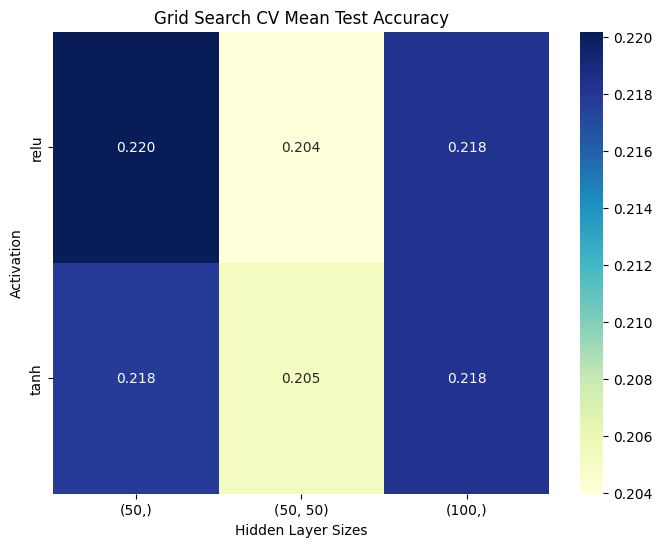

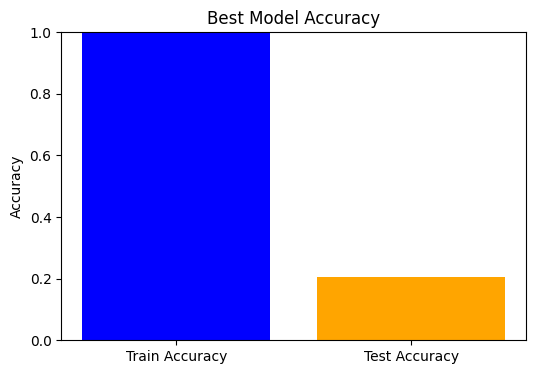

In [30]:
import seaborn as sns

# Create a pivot table from grid search results to plot the mean test scores.
cv_results = pd.DataFrame(grid_search.cv_results_)
pivot_table = cv_results.pivot(index='param_activation', columns='param_hidden_layer_sizes', values='mean_test_score')

# Heatmap of CV Mean Test Accuracy across hyperparameters
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Grid Search CV Mean Test Accuracy")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Activation")
plt.show()

# Plot a bar chart comparing the best model's training and test accuracy.
best_train_score = best_model.score(X_train, y_train)
best_test_score = best_model.score(X_test, y_test)

plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [best_train_score, best_test_score], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title("Best Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

I trained an MLPClassifier on TF-IDF features extracted from the first 10 words of each movie’s overview, using GridSearchCV to explore different hidden layer sizes and activation functions. The heatmap of cross-validation scores illustrates how each hyperparameter combination affected performance: certain settings (like a single 50-neuron layer with the “relu” activation) achieved the highest mean test accuracy of about 22%. However, even with the best combination, the model overfits significantly, reaching 100% training accuracy but only about 20% on the test set. The bar plot comparing training and test accuracy underscores this gap, revealing a classic case of overfitting. These visualizations confirm that while adjusting hyperparameters can help slightly, the model still struggles to generalize when relying on just the first 10 words of the overview. To improve, I would consider using more sophisticated text features (e.g., word embeddings or transformer-based encodings), applying regularization, or capturing additional context from longer text segments.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)